# __1. Import Packages__

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Scientific Calculation
from scipy import stats

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('./Advertising.csv')

# __2. Dataset Overview__

In [3]:
raw_data.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


__'Sales' column will be the dependent variable and the rest of the columns wii be considered as independent variable.__

In [4]:
raw_data = raw_data.drop(columns=['ID'])

In [5]:
raw_data.shape

(200, 4)

__This dataset contains 200 rows and 4 columns.__

### __Dataset Basic Information:__

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### __Descriptions of Numerical Column:__

In [7]:
raw_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## __3. Data Preprocessing__

In [8]:
data = raw_data.copy(deep=True)

In [9]:
numcols = data.select_dtypes(np.number)

### __3.1 Missing values__

In [10]:
# Missing values

data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Figure size 1000x400 with 0 Axes>

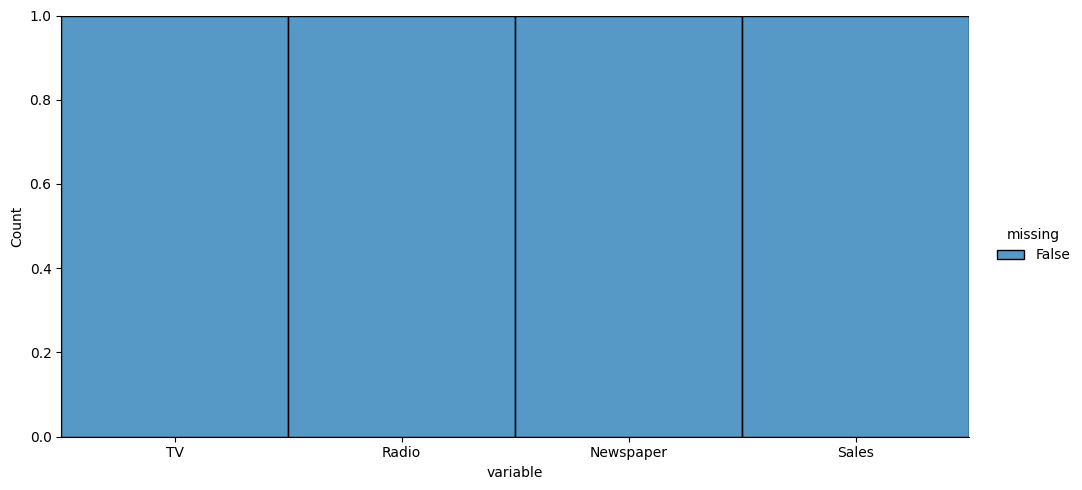

In [11]:
# visualize missing values with seaborn (distplot)

plt.figure(figsize = (10, 4))
sns.displot(
    data = data.isna().melt(value_name = "missing"),
    x = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 2
)
plt.show()


__There is no missing value in the dataset.__

###  __3.2 Duplicated Values__

In [12]:
# Duplicated values

data.duplicated().any()

False

### __3.3 Finding Outliers in the dataset__

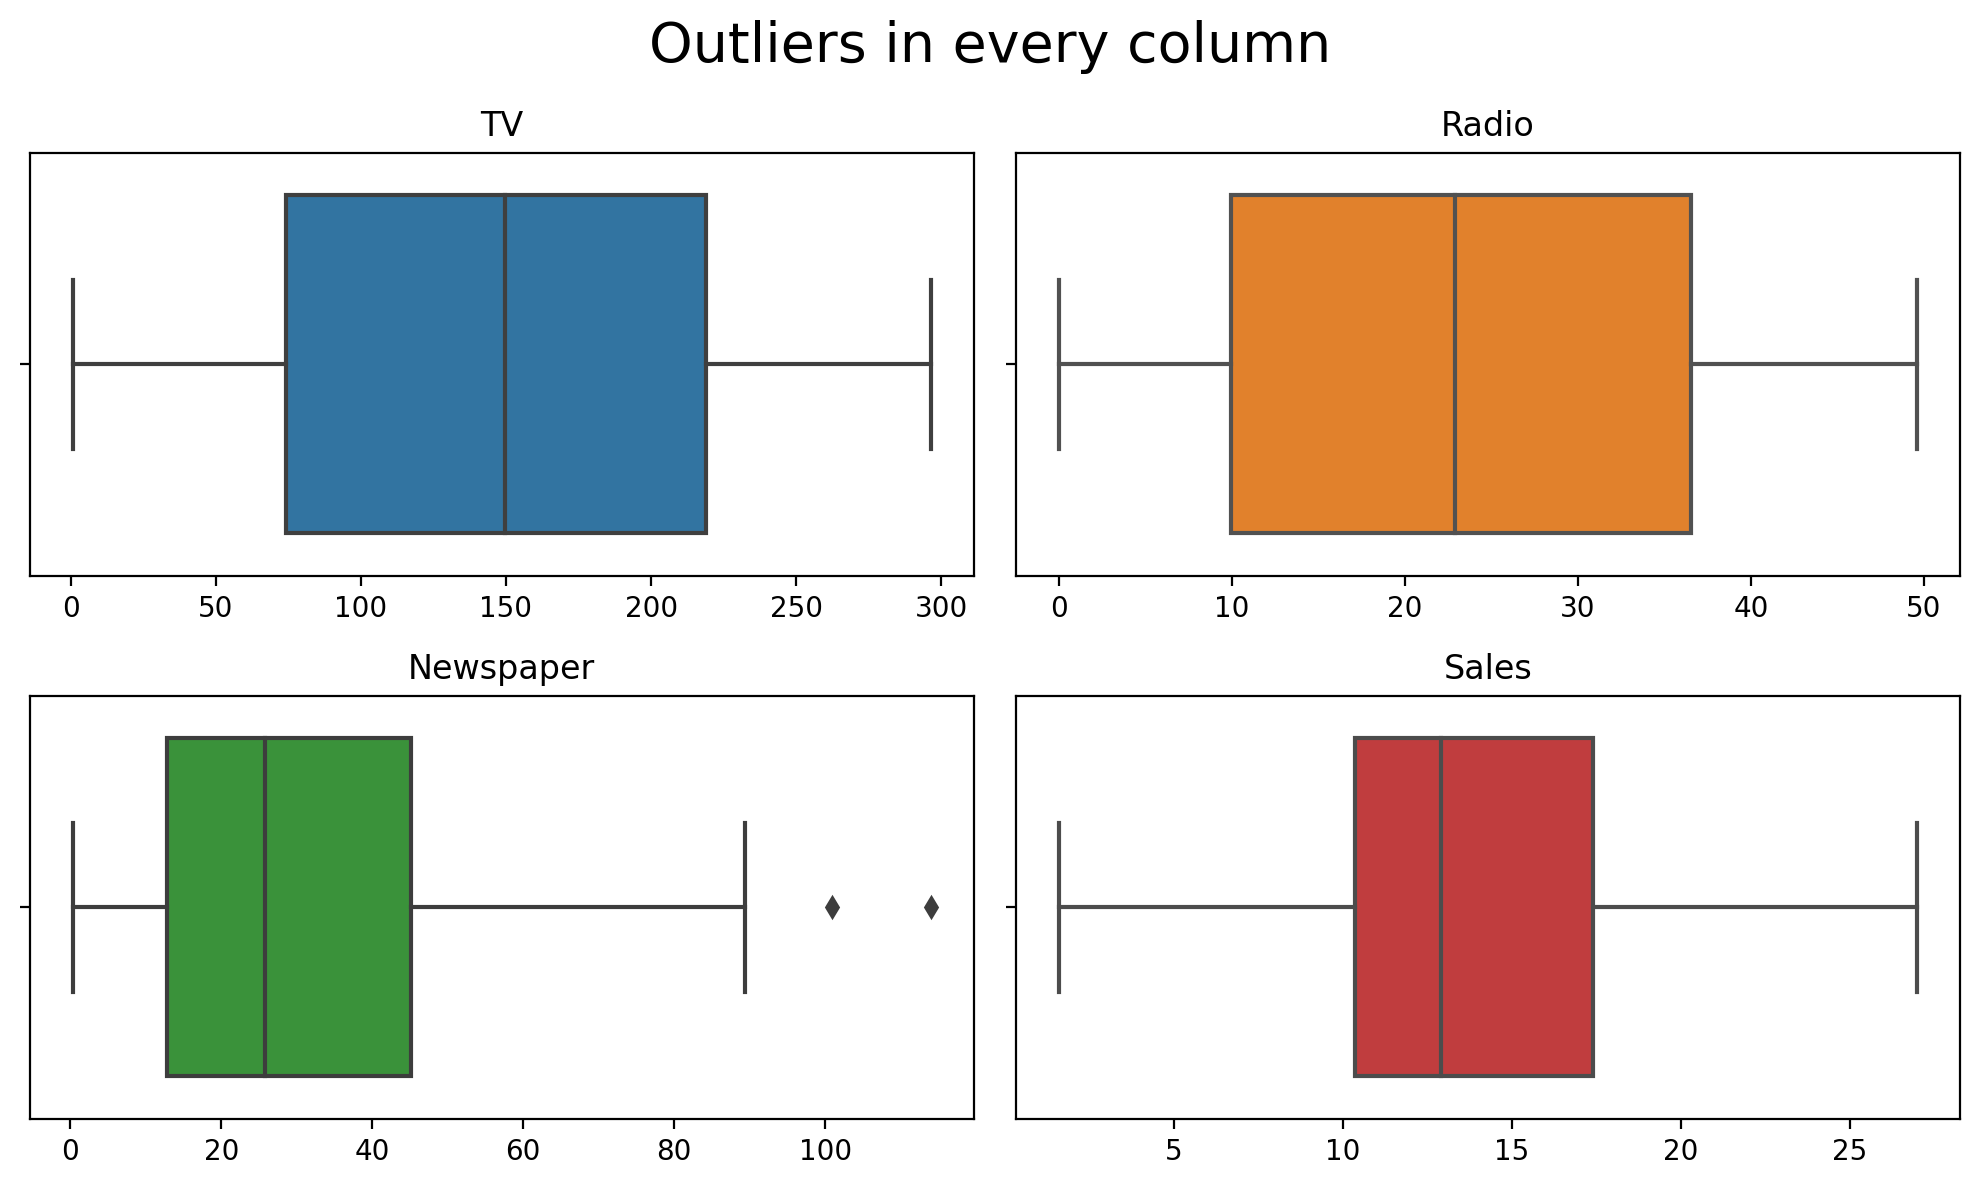

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6), dpi=200)
axes = axes.flat
for index, column in enumerate(numcols):
    graph = sns.boxplot(
        data=data, 
        x=column, 
        color=(list(plt.rcParams['axes.prop_cycle']))[index]['color'],
        ax=axes[index]
)
    axes[index].set_title(column, size=12)
    axes[index].set_xlabel('')
plt.suptitle('Outliers in every column', fontsize=20)
plt.tight_layout()


In [14]:
# finding Outliers

def outliers_zscore(data):
    data = sorted(data)

    mean = np.mean(data)

    std  = np.std(data)

    outliers = []
    for i, value in enumerate(data):
        zscore = (value - mean)/std
        if zscore > 3:
            outliers.append(i)
    return outliers

In [15]:
# finding outliers in every column

for column in data.columns:
    index = list(outliers_zscore(data[column]))
    data = data.drop(index)


### __3.4 Finding Skewness__

In [16]:
from scipy.stats import skew
for col in numcols:
    print("Skewness of", col, "variable is:", data[col].skew())

Skewness of TV variable is: -0.05766635653947347
Skewness of Radio variable is: 0.09436966577389365
Skewness of Newspaper variable is: 0.9078455165572291
Skewness of Sales variable is: 0.3972161502609735


## __4. Exploratory Data Analysis__

### __4.1 Univariate Analysis__

#### __4.1.1 Distribution of every single numerical column__

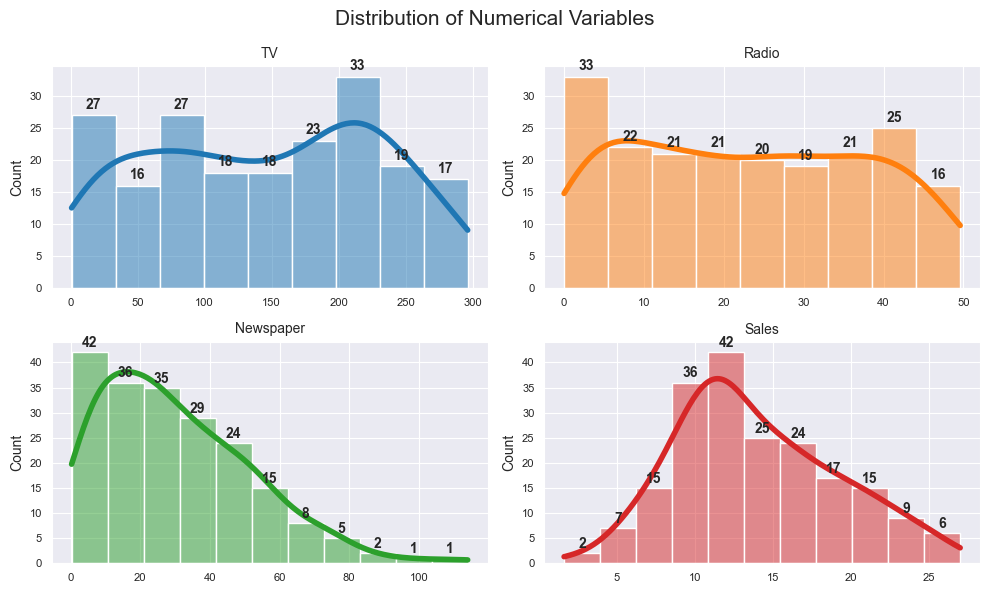

In [17]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axes = axes.flat
for index, column in enumerate(numcols):
    graph = sns.histplot(
        data = data,
        x    = column,
        stat = 'count',
        kde  = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        line_kws= {'linewidth': 4},
        alpha   = 0.5,
        ax      = axes[index]
)
    for p in graph.patches:
        axes[index].annotate(
            f'{p.get_height()}',
            (p.get_x() + p.get_width() / 2, p.get_height() + 1),
            ha='center',
            fontsize=10,
            fontweight="bold",
        )
    axes[index].set_title(column, fontsize = 10)
    axes[index].tick_params(labelsize = 8)
    axes[index].set_xlabel('')
plt.suptitle('Distribution of Numerical Variables', fontsize=15)
plt.tight_layout()

### __4.2 Bivariate Analysis__
#### __4.2.1 Target vs Numerical Features__


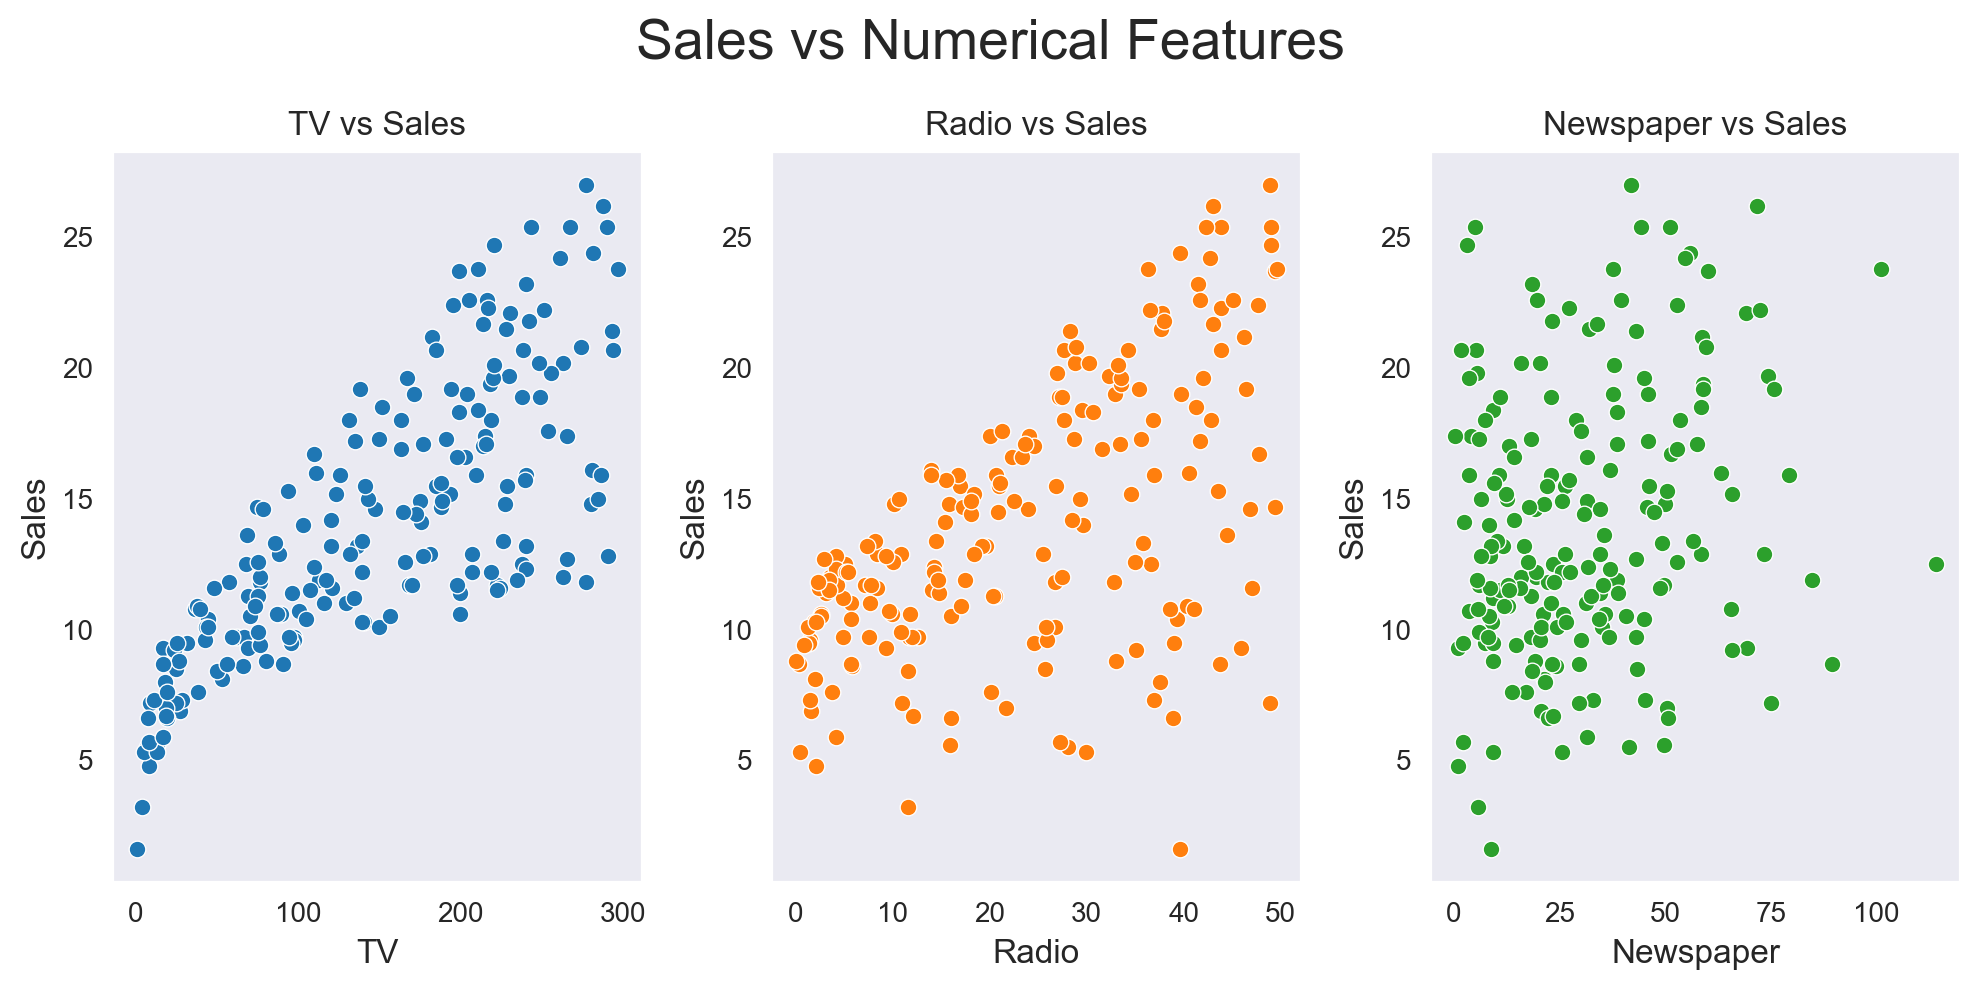

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5), dpi=200)
axes =axes.flat
numfeatures = ['TV', 'Radio', 'Newspaper']
target = 'Sales'
for index, column in enumerate(numfeatures):
    graph = sns.scatterplot(
        x=data[column],
        y=data[target],
        linewidths=0.25,
        color=(list(plt.rcParams['axes.prop_cycle'])*2)[index]['color'],
        ax=axes[index]
)
    axes[index].set_title(f'{column} vs {target}', fontsize=12)
    axes[index].set_xlabel(column, size=12)
    axes[index].set_ylabel(target, size=12)
    axes[index].grid()

plt.suptitle('Sales vs Numerical Features', size=20)
plt.tight_layout()

#### __4.3 Relation between dependent and independant variables__

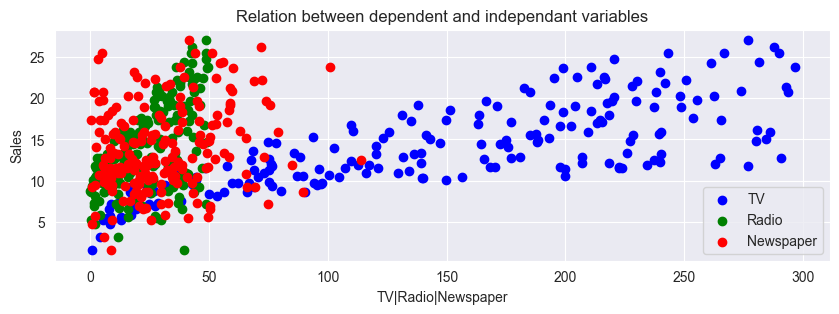

In [19]:
plt.figure(figsize=(10,3))
plt.scatter(data.TV, data.Sales, color='blue', label="TV")
plt.scatter(data.Radio, data.Sales, color='green', label='Radio')
plt.scatter(data.Newspaper, data.Sales, color='red', label='Newspaper')
plt.xlabel("TV|Radio|Newspaper")
plt.ylabel('Sales')
plt.title("Relation between dependent and independant variables")
plt.legend()
plt.show()

#### __4.4 Pairplot for the dataset__

<Figure size 1000x600 with 0 Axes>

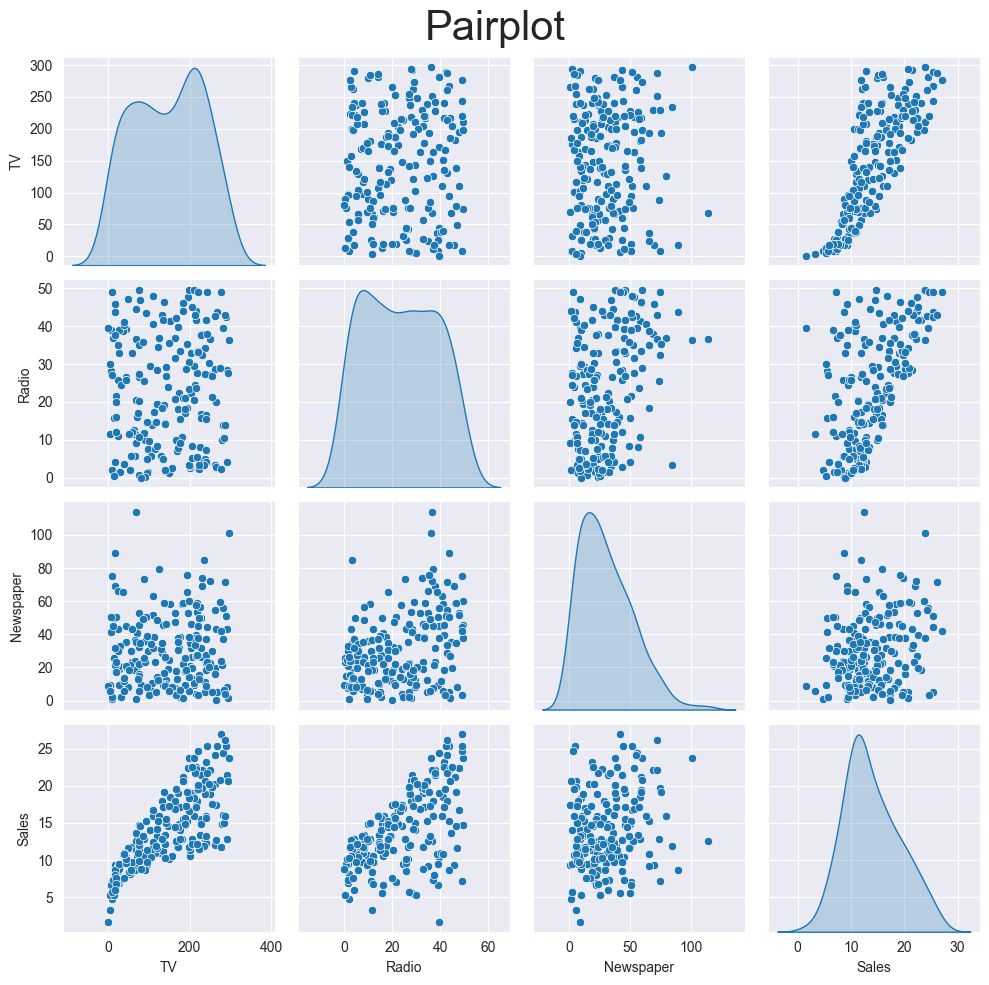

In [20]:
plt.figure(figsize=(10,6))
sns.pairplot(data, diag_kind='kde')
plt.suptitle('Pairplot', size=30)
plt.tight_layout()
plt.show()

### __4.5 Correlation Analysis__

In [21]:
data.corr().style.background_gradient('plasma')

,TV,Radio,Newspaper,Sales
TV,1.000000,0.050396,0.049418,0.781641
Radio,0.050396,1.000000,0.344151,0.572381
Newspaper,0.049418,0.344151,1.000000,0.214180
Sales,0.781641,0.572381,0.214180,1.000000


Text(0.5, 0.98, 'Correlation in heatmap')

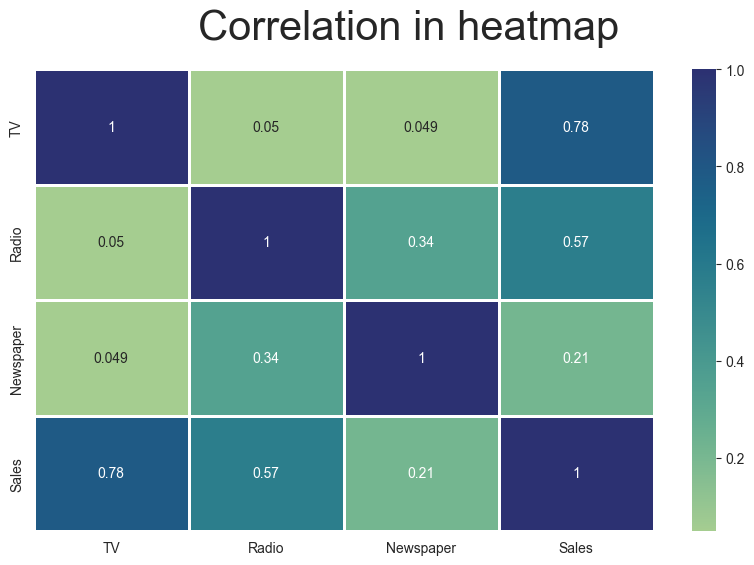

In [22]:
# Using heatmap to find correlation
plt.figure(figsize=(10,6))
sns.heatmap(
    data.corr(), 
    annot=True, 
    cmap='crest', 
    linewidth=True
)
plt.suptitle('Correlation in heatmap', size=30)

 - __The target variable 'Sales' is highly correlated with 'TV' and 'Radio'.__

## __5. Build Linear Regression Model__


### __5.1 Determine Features & Target Variables__

In [23]:
X = data.drop(columns='Sales')
y = data.Sales

### __5.2 Split the dataset into Traing and Test sets__

In [24]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=True, train_size=0.8)

In [25]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ',ytest.shape)

xtrain shape:  (158, 3)
xtest shape:  (40, 3)
ytrain shape:  (158,)
ytest shape:  (40,)


### __5.3 Scale data using StandardScaler__

In [26]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()
# scale.fit(xtrain)
# xtrain_scaled = scale.transform(xtrain)
# xtest_scaled = scale.transform(xtest)

__It is very important that StandardScaler transformation should only be learnt from the training set, otherwise it will lead to data leakage.__

### __5.4 Train the Model__

In [27]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(xtrain, ytrain)

LinearRegression()

In [28]:
pd.DataFrame(
    data=np.append(linear_reg.intercept_, linear_reg.coef_),
    index=['Intercept'] + [f"{col} coef." for col in X.columns],
    columns=['Value']
).sort_values('Value', ascending=False)

,Value
Intercept,3.049536
Radio coef.,0.185244
TV coef.,0.045915
Newspaper coef.,-0.004934


### __5.5 Model Evaluation__

In [33]:
trainacc = linear_reg.score(xtrain, ytrain)
testacc = linear_reg.score(xtest, ytest)

pd.DataFrame([trainacc, testacc], index=['Train Accuracy', 'Test Accuracy'], columns=['Value'])

,Value
Train Accuracy,0.892063
Test Accuracy,0.906940


In [36]:
from sklearn import metrics
def model_evaluation(model, xtest, ytest, model_name):
    ypred = linear_reg.predict(xtest)

    MAE = metrics.mean_absolute_error(ytest, ypred)
    MSE = metrics.mean_squared_error(ytest, ypred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(ytest, ypred)

    return pd.DataFrame(
        [MAE, MSE, RMSE, R2_Score],
        index=['MAE', 'MSE', 'RMSE', 'R2-Score'],
        columns=[model_name],
    )

In [35]:
model_evaluation(linear_reg, xtest, ytest, 'Linear Regression')

,Linear Regression
MAE,1.240696
MSE,2.443743
RMSE,1.563248
R2-Score,90.693955


__The linear regression model obtained R2-score of 90.69%__

In [42]:
ypred = linear_reg.predict(xtest)
df_compare = pd.DataFrame({'Actual':ytest, 'Predicted':ypred}).reset_index(drop=True)
df_compare.head()

,Actual,Predicted
0,27.0,24.615654
1,16.6,16.322396
2,9.5,7.666456
3,11.2,10.077764
4,10.3,9.799004


In [45]:
def compare_plot(data):
    data.plot(y=['Actual', 'Predicted'], kind='bar', figsize=(10,6), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

Text(0, 0.5, 'Predicted')

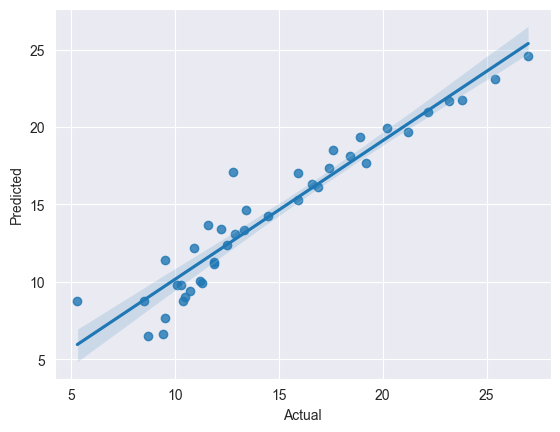

In [48]:
sns.regplot(x=ytest, y=ypred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

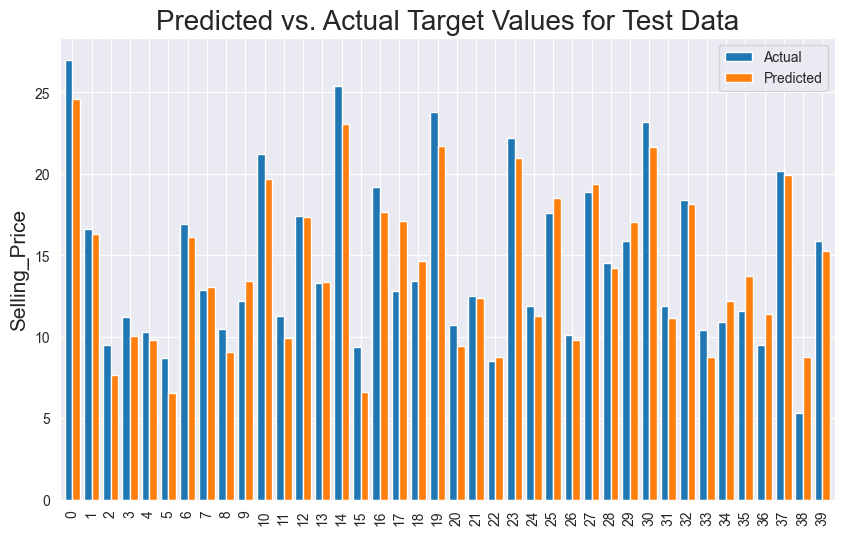

In [46]:
compare_plot(df_compare)

__The difference between the corresponding bars in the above bar plot shows the prediction error of the model on the test data.__